




# **Install Packages**






In [220]:
!pip install optionlab






# **Option Chain Filter**






In [221]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from optionlab import run_strategy, plot_pl
from tabulate import tabulate

# for interactive tables
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [222]:
# example option chain data
fcsv = "https://raw.githubusercontent.com/multidis/hult-options-trading/refs/heads/main/option_chain_data/2024-12-10_option_chain_120days_student2.csv"
dfchain = pd.read_csv(fcsv)
dfchain

,option_type,strike,expiration_date,yearstoexp,bid,ask,volume,open_interest,mid_iv,delta,gamma,theta,vega
0,put,58.0,2024-12-11,0.002740,0.00,0.21,0,0,2.522587,4.000000e-16,-5.371004e-15,0.000000e+00,0.000020
1,call,58.0,2024-12-11,0.002741,13.15,14.10,2,43,3.521227,1.000000e+00,-5.371004e-15,0.000000e+00,0.000020
2,put,59.0,2024-12-11,0.002740,0.00,0.21,0,0,2.353803,4.000000e-16,-5.371004e-15,-5.987392e-32,0.000020
3,call,59.0,2024-12-11,0.002741,11.15,13.15,0,0,3.171770,1.000000e+00,-5.371004e-15,-5.987392e-32,0.000020
4,call,60.0,2024-12-11,0.002740,9.45,13.30,0,0,4.062402,1.000000e+00,-5.371004e-15,-5.036203e-25,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,put,95.0,2025-01-24,0.123289,21.50,25.55,0,0,0.866742,-9.945908e-01,2.056556e-03,-1.420233e-03,0.003887
726,put,100.0,2025-01-24,0.123288,26.50,30.75,0,0,0.959899,-9.987630e-01,5.433839e-04,-3.754888e-04,0.000941
727,call,100.0,2025-01-24,0.123288,0.00,0.93,0,0,0.715673,1.237027e-03,5.433839e-04,-3.754888e-04,0.000941
728,put,105.0,2025-01-24,0.123288,31.50,35.95,0,0,1.043860,-9.997400e-01,1.281880e-04,-8.898104e-05,0.000260


In [223]:
filt_na = ~dfchain.isna().any(axis=1)
filt_prc = (dfchain['bid'] > 0.01) & (dfchain['ask'] > 0.01)
filt_oi = dfchain['open_interest'] > 5
dffilt = dfchain[filt_na & filt_prc & filt_oi]
dffilt

,option_type,strike,expiration_date,yearstoexp,bid,ask,volume,open_interest,mid_iv,delta,gamma,theta,vega
1,call,58.0,2024-12-11,0.002741,13.15,14.10,2,43,3.521227,1.000000,-5.371004e-15,0.000000,0.000020
23,call,69.0,2024-12-11,0.002740,1.95,2.95,0,30,0.972286,0.960465,5.545476e-02,-0.019745,0.003170
24,put,70.0,2024-12-11,0.002740,0.03,0.10,192,373,0.322833,-0.137650,1.575228e-01,-0.080871,0.007722
25,call,70.0,2024-12-11,0.002740,1.40,1.88,11,244,0.524962,0.862350,1.575228e-01,-0.080871,0.007722
26,put,71.0,2024-12-11,0.002740,0.08,0.36,260,253,0.324153,-0.367981,3.098003e-01,-0.214890,0.013572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,put,90.0,2025-01-17,0.104110,16.05,20.95,0,35,0.810827,-0.994255,2.644787e-03,-0.001456,0.004306
647,call,100.0,2025-01-17,0.104110,0.02,0.30,0,1816,0.456145,0.000179,1.065961e-04,-0.000064,0.000223
670,put,67.5,2025-01-24,0.123288,0.38,1.58,0,6,0.278133,-0.226612,4.080242e-02,-0.041777,0.075382
695,call,73.5,2025-01-24,0.123288,1.50,2.05,0,10,0.251700,0.428123,5.310867e-02,-0.035741,0.099320


In [224]:
# Group by expiration and compute totals using the full dataset
summary_total = (
    dffilt.groupby('expiration_date')
    .agg(
        total_volume=('volume', 'sum'),
        total_open_interest=('open_interest', 'sum'),
        total_strike_count=('strike', 'nunique')
    )
    .reset_index()
    .sort_values('expiration_date')
)

# Display as markdown-style table
print(tabulate(summary_total, headers='keys', tablefmt='github', showindex=False))

| expiration_date   |   total_volume |   total_open_interest |   total_strike_count |
|-------------------|----------------|-----------------------|----------------------|
| 2024-12-11        |           1421 |                  5892 |                    6 |
| 2024-12-13        |           1772 |                  8863 |                   18 |
| 2024-12-18        |            444 |                   862 |                    9 |
| 2024-12-20        |          12590 |                148831 |                   36 |
| 2024-12-27        |             83 |                  2303 |                   23 |
| 2025-01-03        |             97 |                  1180 |                   19 |
| 2025-01-10        |             77 |                   449 |                   10 |
| 2025-01-17        |          17538 |                160150 |                   37 |
| 2025-01-24        |              0 |                    23 |                    3 |


In [225]:
# Find rows where call delta is near 0.5 (ATM calls)
atm_calls = dffilt[abs(dffilt['delta'] - 0.5) < 0.02]

# Find rows where put delta is near -0.5 (ATM puts)
atm_puts = dffilt[abs(dffilt['delta'] - (-0.5)) < 0.02]

# Display the rows for ATM calls
print("Rows for ATM Calls (delta ~ 0.5):")
display(atm_calls)

# Display the rows for ATM Puts
print("\nRows for ATM Puts (delta ~ -0.5):")
display(atm_puts)

Rows for ATM Calls (delta ~ 0.5):


,option_type,strike,expiration_date,yearstoexp,bid,ask,volume,open_interest,mid_iv,delta,gamma,theta,vega
101,call,71.5,2024-12-13,0.008219,0.71,0.99,72,229,0.302525,0.487054,0.207081,-0.132289,0.025917
258,call,71.5,2024-12-20,0.027397,1.24,1.35,12,77,0.274277,0.506240,0.128564,-0.066869,0.047201
445,call,72.0,2025-01-03,0.065753,1.20,2.35,0,213,0.255744,0.494734,0.089416,-0.045589,0.072923
522,call,72.0,2025-01-10,0.084932,1.65,2.45,3,23,0.255810,0.503714,0.073044,-0.042446,0.083484
610,call,72.0,2025-01-17,0.104110,1.94,2.08,228,15297,0.237634,0.483852,0.075981,-0.030245,0.092321



Rows for ATM Puts (delta ~ -0.5):


,option_type,strike,expiration_date,yearstoexp,bid,ask,volume,open_interest,mid_iv,delta,gamma,theta,vega
100,put,71.5,2024-12-13,0.008219,0.58,0.85,46,135,0.296924,-0.512946,0.207081,-0.132289,0.025917
259,put,71.5,2024-12-20,0.027397,1.26,1.36,29,81,0.274446,-0.493760,0.128564,-0.066869,0.047201
444,put,72.0,2025-01-03,0.065754,1.41,2.45,0,184,0.244417,-0.505266,0.089416,-0.045589,0.072923
523,put,72.0,2025-01-10,0.084932,1.99,2.83,3,10,0.275936,-0.496286,0.073044,-0.042446,0.083484
611,put,72.0,2025-01-17,0.104110,2.08,2.60,93,739,0.252392,-0.516148,0.075981,-0.030245,0.092321


In [226]:
# Filter ATM CALLS within 2% delta of 0.5
atm_calls_nearby = dffilt[abs(dffilt['delta'] - 0.5) <= 0.025].copy()

# Filter ATM PUTS within 2% delta of -0.5
atm_puts_nearby = dffilt[abs(dffilt['delta'] - (-0.5)) <= 0.025].copy()

# Combine the nearby calls and puts
atm_nearby_combined = pd.concat([atm_calls_nearby, atm_puts_nearby]).sort_values(['expiration_date', 'strike'])

# Select and round for display
summary_nearby = atm_nearby_combined[['expiration_date', 'strike', 'option_type', 'delta', 'mid_iv', 'volume', 'open_interest']].copy()
summary_nearby['delta'] = summary_nearby['delta'].round(3)
summary_nearby['mid_iv'] = summary_nearby['mid_iv'].round(3)

# Display as markdown-style table
print("Options with delta within +/- 0.02 of ATM (0.5 for calls, -0.5 for puts):")
print(tabulate(summary_nearby, headers='keys', tablefmt='github', showindex=False))

Options with delta within +/- 0.02 of ATM (0.5 for calls, -0.5 for puts):
| expiration_date   |   strike | option_type   |   delta |   mid_iv |   volume |   open_interest |
|-------------------|----------|---------------|---------|----------|----------|-----------------|
| 2024-12-13        |     71.5 | call          |   0.487 |    0.303 |       72 |             229 |
| 2024-12-13        |     71.5 | put           |  -0.513 |    0.297 |       46 |             135 |
| 2024-12-20        |     71.5 | call          |   0.506 |    0.274 |       12 |              77 |
| 2024-12-20        |     71.5 | put           |  -0.494 |    0.274 |       29 |              81 |
| 2024-12-27        |     72   | call          |   0.48  |    0.263 |       10 |              39 |
| 2024-12-27        |     72   | put           |  -0.52  |    0.24  |        2 |             349 |
| 2025-01-03        |     72   | call          |   0.495 |    0.256 |        0 |             213 |
| 2025-01-03        |     72   | pu

In [227]:
# underlying price near ATM contracts
dfatm = dffilt[abs(dffilt['delta'] - 0.5) < 0.025]
dfatm

,option_type,strike,expiration_date,yearstoexp,bid,ask,volume,open_interest,mid_iv,delta,gamma,theta,vega
101,call,71.5,2024-12-13,0.008219,0.71,0.99,72,229,0.302525,0.487054,0.207081,-0.132289,0.025917
258,call,71.5,2024-12-20,0.027397,1.24,1.35,12,77,0.274277,0.506240,0.128564,-0.066869,0.047201
363,call,72.0,2024-12-27,0.046576,1.08,1.90,10,39,0.263226,0.479716,0.110982,-0.051745,0.061589
445,call,72.0,2025-01-03,0.065753,1.20,2.35,0,213,0.255744,0.494734,0.089416,-0.045589,0.072923
522,call,72.0,2025-01-10,0.084932,1.65,2.45,3,23,0.255810,0.503714,0.073044,-0.042446,0.083484
610,call,72.0,2025-01-17,0.104110,1.94,2.08,228,15297,0.237634,0.483852,0.075981,-0.030245,0.092321


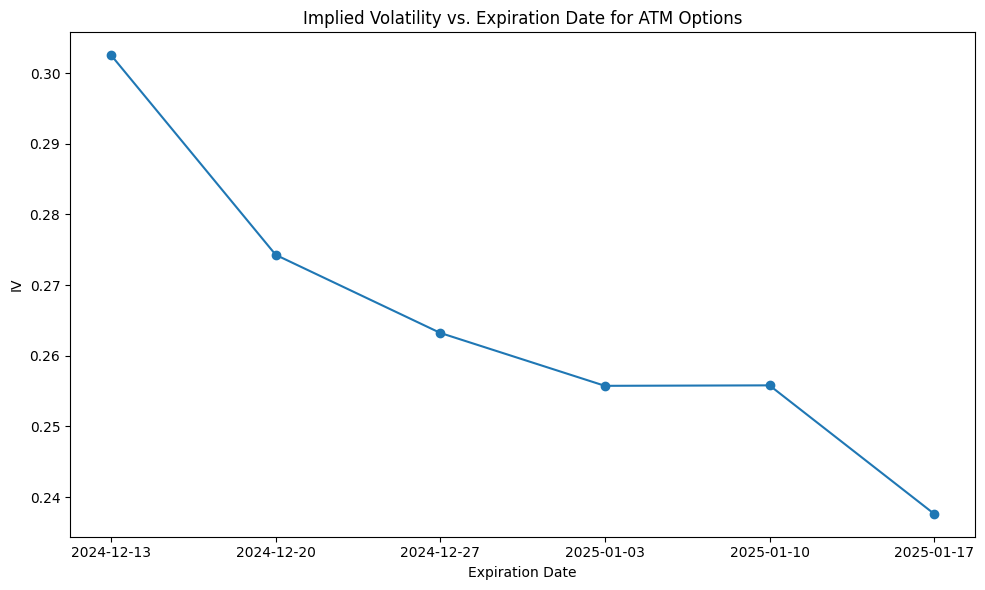

In [228]:
# dfatm['expiration_date'] = pd.to_datetime(dfatm['expiration_date'])

plt.figure(figsize=(10, 6)) # Optional: Increase figure size for better readability of dates
plt.plot(dfatm['expiration_date'], dfatm['mid_iv'], marker='o')
plt.xlabel('Expiration Date')
plt.ylabel('IV')
plt.title('Implied Volatility vs. Expiration Date for ATM Options') # Optional: Add a title
plt.tight_layout() # Optional: Adjust layout to prevent labels from overlapping
plt.show()

In [229]:
# Initialize und_price
und_price = None

# Check if there are any ATM calls found and use the strike from the first one
if not atm_calls.empty:
    und_price = atm_calls['strike'].iloc[0]
elif not atm_puts.empty:
    # If no ATM calls, check for ATM puts and use the strike from the first one
    und_price = atm_puts['strike'].iloc[0]
else:
    print("Warning: No ATM options found based on delta criteria. Cannot set und_price to ATM strike.")

# Check if und_price was successfully set and print its value
if und_price is not None:
    print(f"Underlying price (set to ATM strike): {und_price}")
else:
    print("Underlying price was not set as no ATM strike was identified.")


start_date = dt.date(2024, 12, 10)

#Risk-free interest rate
inter = 0.05
und_min = und_price - round(0.2*und_price, 2)
und_max = und_price + round(0.2*und_price, 2)

Underlying price (set to ATM strike): 71.5


In [230]:
# Step 1: Convert column to datetime
dffilt['expiration_date'] = pd.to_datetime(dffilt['expiration_date'], errors='coerce')

# Step 2: Define target date
target_expiry_date = dt.date(2024, 12, 20)

# Step 3: Filter the DataFrame
df_expiry_2024_12_20 = dffilt[dffilt['expiration_date'].dt.date == target_expiry_date].copy()

# Step 4: Check if empty
if df_expiry_2024_12_20.empty:
    print(f"⚠️ No data found for expiration date {target_expiry_date}.")
else:
    print(f"✅ Successfully filtered data for expiration date {target_expiry_date}.")
    display(df_expiry_2024_12_20)

    df_filtered_expiry = df_expiry_2024_12_20.copy()

    # Get and assign end date
    expiration_date = df_filtered_expiry['expiration_date'].iloc[0].date()
    end_date = expiration_date

✅ Successfully filtered data for expiration date 2024-12-20.


<ipython-input-230-ed9394021995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffilt['expiration_date'] = pd.to_datetime(dffilt['expiration_date'], errors='coerce')


,option_type,strike,expiration_date,yearstoexp,bid,ask,volume,open_interest,mid_iv,delta,gamma,theta,vega
213,call,35.0,2024-12-20,0.027398,34.55,38.55,0,54,3.850628,1.000000,7.880507e-15,-1.383814e-31,0.000020
215,call,40.0,2024-12-20,0.027398,29.55,33.55,0,10,3.209200,1.000000,-2.327426e-16,-4.653318e-19,0.000020
217,call,45.0,2024-12-20,0.027397,26.05,26.90,0,42,1.784117,1.000000,1.155271e-11,-7.024061e-12,0.000020
219,call,50.0,2024-12-20,0.027398,21.05,22.20,0,32,1.785967,1.000000,9.109107e-09,-6.119256e-09,0.000020
221,call,55.0,2024-12-20,0.027398,15.65,18.50,0,20,1.810189,0.999956,3.491293e-05,-4.773318e-05,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,put,79.0,2024-12-20,0.027398,6.35,8.75,0,66,0.477435,-0.986463,1.147022e-02,-6.069830e-03,0.004224
285,call,79.0,2024-12-20,0.027397,0.04,0.08,8895,44355,0.348513,0.013537,1.147022e-02,-6.069830e-03,0.004224
286,put,80.0,2024-12-20,0.027398,7.65,9.10,0,105,0.658549,-0.992474,6.730602e-03,-3.733847e-03,0.002663
287,call,80.0,2024-12-20,0.027397,0.03,0.24,48,6883,0.319507,0.007526,6.730602e-03,-3.733847e-03,0.002663







# **Bull Put Spread**






In [231]:
# Strategy Definition (Bull Put Spread)
sell_strike = 71
buy_strike = 69

# Get index of each leg
isell_put = df_expiry_2024_12_20[(df_expiry_2024_12_20["option_type"] == "put") &
                                 (df_expiry_2024_12_20["strike"] == sell_strike)].index[0]

ibuy_put = df_expiry_2024_12_20[(df_expiry_2024_12_20["option_type"] == "put") &
                                (df_expiry_2024_12_20["strike"] == buy_strike)].index[0]

# Construct the strategy as a list of option legs
strategy = [
    {
        "type": "put",
        "strike": df_expiry_2024_12_20.loc[isell_put, 'strike'],
        "premium": (df_expiry_2024_12_20.loc[isell_put, 'bid']),
        "n": 100,
        "action": "sell",
        "expiration": df_expiry_2024_12_20.loc[isell_put, 'expiration_date'].date()
    },
    {
        "type": "put",
        "strike": df_expiry_2024_12_20.loc[ibuy_put, 'strike'],
        "premium": (df_expiry_2024_12_20.loc[ibuy_put, 'ask']),
        "n": 100,
        "action": "buy",
        "expiration": df_expiry_2024_12_20.loc[ibuy_put, 'expiration_date'].date()
    }
]

strategy

[{'type': 'put',
  'strike': np.float64(71.0),
  'premium': np.float64(1.02),
  'n': 100,
  'action': 'sell',
  'expiration': datetime.date(2024, 12, 20)},
 {'type': 'put',
  'strike': np.float64(69.0),
  'premium': np.float64(0.47),
  'n': 100,
  'action': 'buy',
  'expiration': datetime.date(2024, 12, 20)}]

In [232]:
inputs = {
    "stock_price": und_price,
    "start_date": start_date,
    "target_date": end_date,
    "volatility": df_expiry_2024_12_20.loc[isell_put, 'mid_iv'],
    "interest_rate": inter,
    "min_stock": und_min,
    "max_stock": und_max,
    "strategy": strategy
}
inputs

{'stock_price': np.float64(71.5),
 'start_date': datetime.date(2024, 12, 10),
 'target_date': datetime.date(2024, 12, 20),
 'volatility': np.float64(0.274532),
 'interest_rate': 0.05,
 'min_stock': np.float64(57.2),
 'max_stock': np.float64(85.8),
 'strategy': [{'type': 'put',
   'strike': np.float64(71.0),
   'premium': np.float64(1.02),
   'n': 100,
   'action': 'sell',
   'expiration': datetime.date(2024, 12, 20)},
  {'type': 'put',
   'strike': np.float64(69.0),
   'premium': np.float64(0.47),
   'n': 100,
   'action': 'buy',
   'expiration': datetime.date(2024, 12, 20)}]}

Profit/Loss diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.
Probability of profit: 0.6144343226984698
Profit ranges: [(70.46, inf)]
Per leg cost: [102.0, -47.0]
Strategy cost: 55.0
Minimum return in the domain: -145.00000000000023
Maximum return in the domain: 55.0
Implied volatility: [0.244, 0.266]
In the money probability: [0.44285318416027974, 0.24369048445133895]
Delta: [0.42245343808683644, -0.22772435300056548]
Gamma: [0.1055067810349335, 0.08140045043140612]
Theta: [0.07443060191638964, -0.058898925702511276]
Vega: [0.05288437782669849, 0.04080128436913067]
Rho: [0.011209456685690617, -0.005994515739741528]



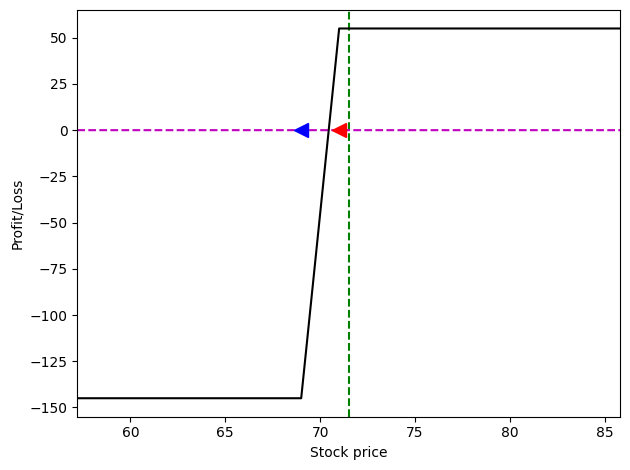

In [233]:
st = run_strategy(inputs)

plot_pl(st)
print(st)






# **Bear Call Spread**






In [234]:
# Bear Call Spread Definition
sell_strike = 72
buy_strike = 74

# Get index of each call leg
isell_call = df_expiry_2024_12_20[(df_expiry_2024_12_20["option_type"] == "call") &
                                  (df_expiry_2024_12_20["strike"] == sell_strike)].index[0]

ibuy_call = df_expiry_2024_12_20[(df_expiry_2024_12_20["option_type"] == "call") &
                                 (df_expiry_2024_12_20["strike"] == buy_strike)].index[0]

# Construct the strategy as a list of option legs
strategy = [
    {
        "type": "call",
        "strike": df_expiry_2024_12_20.loc[isell_call, 'strike'],
        "premium": df_expiry_2024_12_20.loc[isell_call, 'bid'],
        "n": 100,
        "action": "sell",
        "expiration": df_expiry_2024_12_20.loc[isell_call, 'expiration_date'].date()
    },
    {
        "type": "call",
        "strike": df_expiry_2024_12_20.loc[ibuy_call, 'strike'],
        "premium": df_expiry_2024_12_20.loc[ibuy_call, 'ask'],
        "n": 100,
        "action": "buy",
        "expiration": df_expiry_2024_12_20.loc[ibuy_call, 'expiration_date'].date()
    }
]

strategy

[{'type': 'call',
  'strike': np.float64(72.0),
  'premium': np.float64(0.99),
  'n': 100,
  'action': 'sell',
  'expiration': datetime.date(2024, 12, 20)},
 {'type': 'call',
  'strike': np.float64(74.0),
  'premium': np.float64(0.47),
  'n': 100,
  'action': 'buy',
  'expiration': datetime.date(2024, 12, 20)}]

In [235]:
inputs = {
    "stock_price": und_price,
    "start_date": start_date,
    "target_date": end_date,
    "volatility": df_expiry_2024_12_20.loc[isell_call, 'mid_iv'],
    "interest_rate": inter,
    "min_stock": und_min,
    "max_stock": und_max,
    "strategy": strategy
}
inputs

{'stock_price': np.float64(71.5),
 'start_date': datetime.date(2024, 12, 10),
 'target_date': datetime.date(2024, 12, 20),
 'volatility': np.float64(0.2716),
 'interest_rate': 0.05,
 'min_stock': np.float64(57.2),
 'max_stock': np.float64(85.8),
 'strategy': [{'type': 'call',
   'strike': np.float64(72.0),
   'premium': np.float64(0.99),
   'n': 100,
   'action': 'sell',
   'expiration': datetime.date(2024, 12, 20)},
  {'type': 'call',
   'strike': np.float64(74.0),
   'premium': np.float64(0.47),
   'n': 100,
   'action': 'buy',
   'expiration': datetime.date(2024, 12, 20)}]}

Profit/Loss diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.
Probability of profit: 0.6041708363822128
Profit ranges: [(0.0, 72.51)]
Per leg cost: [99.0, -47.0]
Strategy cost: 52.0
Minimum return in the domain: -148.00000000000023
Maximum return in the domain: 52.0
Implied volatility: [0.215, 0.243]
In the money probability: [0.4496119674897172, 0.25448322220214326]
Delta: [-0.46998236375105307, 0.271222344572661]
Gamma: [0.10839807390794523, 0.09029956578340814]
Theta: [0.08751937279723418, -0.07129556524515643]
Vega: [0.053753331173581616, 0.04477849365209413]
Rho: [-0.011540823567573825, 0.006713628682193869]



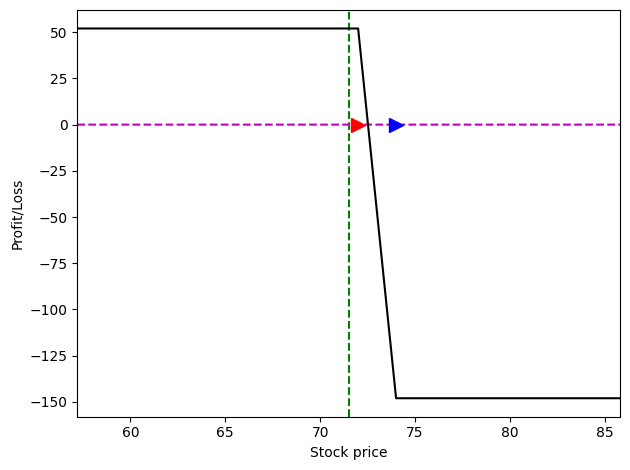

In [236]:
st = run_strategy(inputs)

plot_pl(st)
print(st)






# **Short Iron Butterfly**






In [237]:
# Define strike legs for Iron Butterfly
center_strike = 71.5   # ATM short put & call
lower_put_strike = 66.0  # long OTM put
upper_call_strike = 77.0  # long OTM call

# Try to safely find all required rows
try:
    isell_put = df_expiry_2024_12_20.query("option_type == 'put' and strike == @center_strike").index[0]
    ibuy_put  = df_expiry_2024_12_20.query("option_type == 'put' and strike == @lower_put_strike").index[0]
    isell_call = df_expiry_2024_12_20.query("option_type == 'call' and strike == @center_strike").index[0]
    ibuy_call  = df_expiry_2024_12_20.query("option_type == 'call' and strike == @upper_call_strike").index[0]
except IndexError:
    raise ValueError("⚠️ One or more strike prices not found. Please check the availability in df_expiry_2024_12_20.")

# Build Iron Butterfly strategy
strategy = [
    {
        "type": "put", "strike": center_strike,
        "premium": df_expiry_2024_12_20.loc[isell_put, 'bid'],
        "n": 100, "action": "sell",
        "expiration": df_expiry_2024_12_20.loc[isell_put, 'expiration_date'].date()
    },
    {
        "type": "put", "strike": lower_put_strike,
        "premium": df_expiry_2024_12_20.loc[ibuy_put, 'ask'],
        "n": 100, "action": "buy",
        "expiration": df_expiry_2024_12_20.loc[ibuy_put, 'expiration_date'].date()
    },
    {
        "type": "call", "strike": center_strike,
        "premium": df_expiry_2024_12_20.loc[isell_call, 'bid'],
        "n": 100, "action": "sell",
        "expiration": df_expiry_2024_12_20.loc[isell_call, 'expiration_date'].date()
    },
    {
        "type": "call", "strike": upper_call_strike,
        "premium": df_expiry_2024_12_20.loc[ibuy_call, 'ask'],
        "n": 100, "action": "buy",
        "expiration": df_expiry_2024_12_20.loc[ibuy_call, 'expiration_date'].date()
    }
]

strategy

[{'type': 'put',
  'strike': 71.5,
  'premium': np.float64(1.26),
  'n': 100,
  'action': 'sell',
  'expiration': datetime.date(2024, 12, 20)},
 {'type': 'put',
  'strike': 66.0,
  'premium': np.float64(0.14),
  'n': 100,
  'action': 'buy',
  'expiration': datetime.date(2024, 12, 20)},
 {'type': 'call',
  'strike': 71.5,
  'premium': np.float64(1.24),
  'n': 100,
  'action': 'sell',
  'expiration': datetime.date(2024, 12, 20)},
 {'type': 'call',
  'strike': 77.0,
  'premium': np.float64(0.14),
  'n': 100,
  'action': 'buy',
  'expiration': datetime.date(2024, 12, 20)}]

In [238]:
inputs = {
    "stock_price": und_price,
    "start_date": start_date,
    "target_date": end_date,
    "volatility": df_expiry_2024_12_20.loc[isell_call, 'mid_iv'],
    "volatility": df_expiry_2024_12_20.loc[isell_put, 'mid_iv'],
    "interest_rate": inter,
    "min_stock": und_min,
    "max_stock": und_max,
    "strategy": strategy
}
inputs

{'stock_price': np.float64(71.5),
 'start_date': datetime.date(2024, 12, 10),
 'target_date': datetime.date(2024, 12, 20),
 'volatility': np.float64(0.274446),
 'interest_rate': 0.05,
 'min_stock': np.float64(57.2),
 'max_stock': np.float64(85.8),
 'strategy': [{'type': 'put',
   'strike': 71.5,
   'premium': np.float64(1.26),
   'n': 100,
   'action': 'sell',
   'expiration': datetime.date(2024, 12, 20)},
  {'type': 'put',
   'strike': 66.0,
   'premium': np.float64(0.14),
   'n': 100,
   'action': 'buy',
   'expiration': datetime.date(2024, 12, 20)},
  {'type': 'call',
   'strike': 71.5,
   'premium': np.float64(1.24),
   'n': 100,
   'action': 'sell',
   'expiration': datetime.date(2024, 12, 20)},
  {'type': 'call',
   'strike': 77.0,
   'premium': np.float64(0.14),
   'n': 100,
   'action': 'buy',
   'expiration': datetime.date(2024, 12, 20)}]}

Profit/Loss diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.
Probability of profit: 0.44885441021915784
Profit ranges: [(69.29, 73.71)]
Per leg cost: [126.0, -14.000000000000002, 124.0, -14.000000000000002]
Strategy cost: 222.0
Minimum return in the domain: -328.0000000000002
Maximum return in the domain: 222.0
Implied volatility: [0.245, 0.303, 0.218, 0.271]
In the money probability: [0.49661020528369837, 0.06035814856769367, 0.5033897947163016, 0.07775228579783922]
Delta: [0.4759334718128405, -0.054396772740614274, -0.5240665281871595, 0.08557955610819545]
Gamma: [0.10738285103997189, 0.029737014117078443, 0.10738285103997189, 0.04217558311088218]
Theta: [0.07500828069595208, -0.021930189229042194, 0.08916947818791038, -0.03340805665865176]
Vega: [0.053807880822

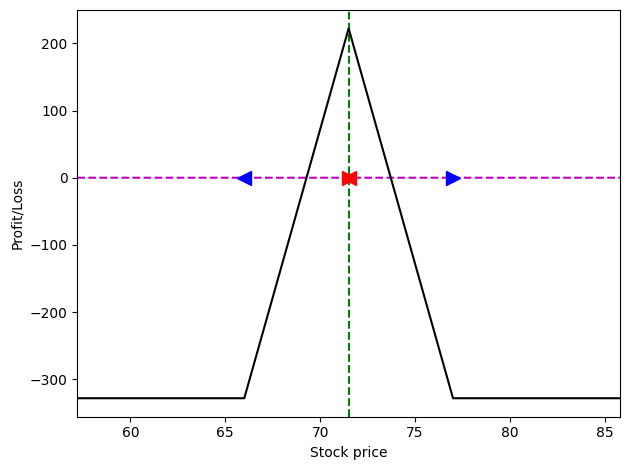

In [239]:
st = run_strategy(inputs)

plot_pl(st)
print(st)